In [499]:
from astropy.io import fits
import numpy as np
from scipy import interpolate
from datetime import datetime
from astropy.time import Time
import matplotlib.pyplot as plt
%matplotlib notebook
import matplotlib.pyplot as plt
from astropy.io import ascii
import glob
import healpy as hp
from astropy.wcs import WCS
from astropy.utils.data import get_pkg_data_filename
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.coordinates import EarthLocation
from astropy.coordinates import AltAz

In [3]:
data1 = '/data4/dylang65/HPX_001.fits'
data2= '/data4/dylang65/HPX_192.fits'

In [4]:
x=fits.open(data1)
y=fits.open(data2)

In [5]:
print(x)

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7fb80872c3d0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fb808741b10>]


In [6]:
print(x[0])

In [7]:
info=x[0]

In [8]:
info.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   64 / array data type                                
NAXIS   =                    1 / number of array dimensions                     
NAXIS1  =                    1                                                  
EXTEND  =                    T                                                  
CHECKSUM= '8SP4APP22PP28PP2'   / HDU checksum updated 2016-09-12T22:01:41       
DATASUM = '0       '           / data unit checksum updated 2016-09-12T22:01:41 

In [9]:
rawdata=x[1]

In [10]:
rawdata.header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 3772 / length of dimension 1                          
NAXIS2  =                65536 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    6 / number of table fields                         
TTYPE1  = 'HPXINDEX'                                                            
TFORM1  = '1K      '                                                            
TTYPE2  = 'RA2000  '                                                            
TFORM2  = '1D      '                                                            
TTYPE3  = 'DEC2000 '        

axis 2 (65536 pixels) is healpix

axis 1 (3772) is velocity

In [11]:
rawdata.data.shape

(65536,)

In [12]:
rawdata.data[0]

(0, 192.9097104359203, 27.137878623824395, 45.0, 89.95431463934247, array([ 2.49840003e-02,  1.23178037e-02, -4.62351963e-02, -9.53008458e-02,
       -1.79042630e-02, -1.23658953e-02, -6.09922446e-02, -1.53242024e-02,
       -4.15031856e-04, -2.53619291e-02, -9.78147984e-02,  1.67899635e-02,
        7.26935416e-02, -2.38794438e-03,  1.11164637e-02,  4.01585475e-02,
       -1.94550753e-02, -1.51489889e-02, -2.28657275e-02, -1.90733951e-02,
       -9.97673813e-03,  9.56650972e-02, -1.70804877e-02,  4.80969101e-02,
       -1.44442916e-02, -2.67546773e-02, -4.35291789e-02, -2.15121340e-02,
        1.11227101e-02, -3.25064287e-02, -9.89895500e-03,  1.81806535e-02,
        2.13323836e-03,  2.99624782e-02,  7.47444108e-02,  6.81831241e-02,
       -9.14504081e-02, -1.42124016e-02,  1.92864481e-02, -8.26910362e-02,
       -9.43669397e-03, -1.82616394e-02,  3.79633047e-02, -5.48772588e-02,
        3.31766158e-02,  7.47940689e-02,  5.97322173e-02,  1.51357902e-02,
       -2.66353637e-02, -2.72260

In [13]:
rawdata.columns

ColDefs(
    name = 'HPXINDEX'; format = '1K'
    name = 'RA2000'; format = '1D'
    name = 'DEC2000'; format = '1D'
    name = 'GLON'; format = '1D'
    name = 'GLAT'; format = '1D'
    name = 'DATA'; format = '933E'
)

In [14]:
data['DEC2000']

NameError: name 'data' is not defined

In [15]:
data = rawdata.data

In [16]:
data['HPXINDEX'].shape

(65536,)

In [17]:
data['data'].shape

(65536, 933)

In [18]:
files = sorted(glob.glob('/data4/dylang65/*fits'))

In [19]:
# print(files)

In [20]:
final_data_array = np.zeros(12 * 1024**2)

In [21]:
for fname in files:
    hdul = fits.open(fname)
    data = hdul[1]
    ndata = data.data
    final_data_array[ndata['HPXINDEX']] = np.nanmean(ndata['data'], axis=1)

<IPython.core.display.Javascript object>


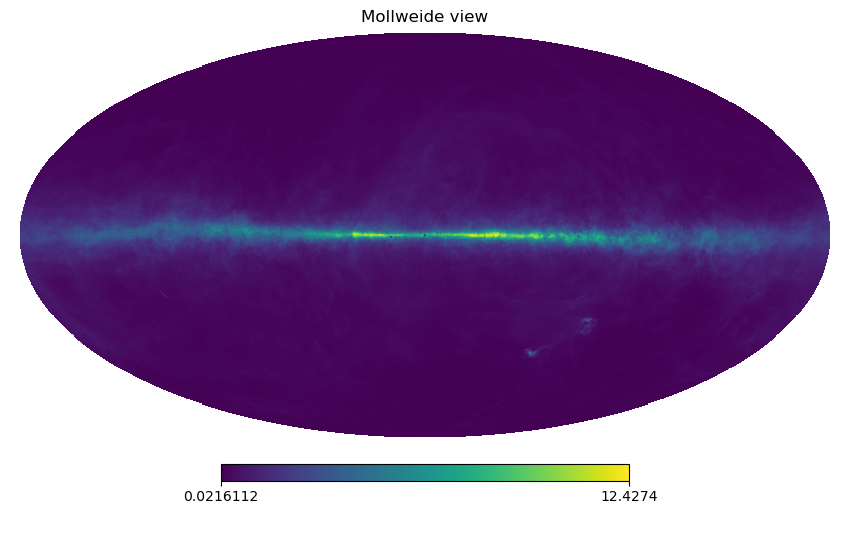

In [22]:
hp.mollview(final_data_array)

In [23]:
test = hp.ud_grade(final_data_array, 32)

<IPython.core.display.Javascript object>


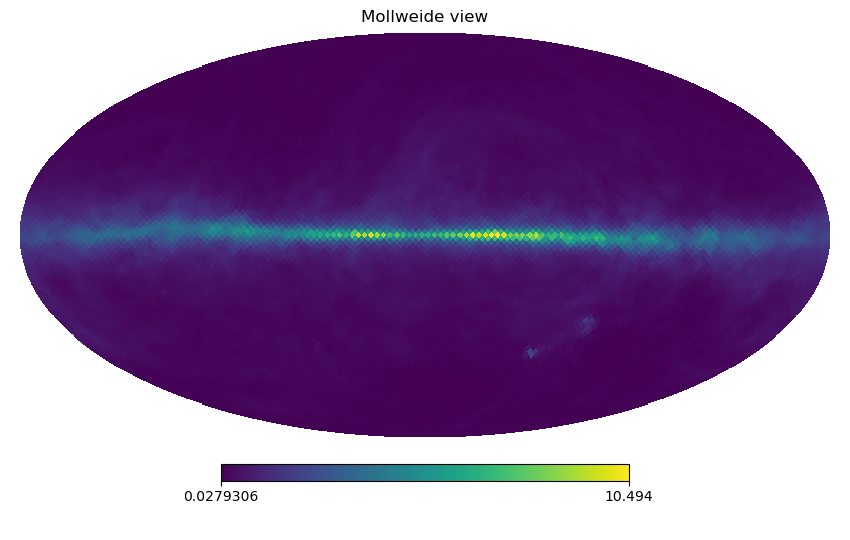

In [24]:
hp.mollview(test)

In [26]:
y[1]

In [27]:
y[1].data

FITS_rec([(12061436,  5.41467786, -49.93457412, 315.        , -66.49020166, [            nan,             nan,             nan,             nan,             nan,             nan,             nan,             nan,             nan,             nan,             nan,             nan,             nan,             nan,             nan,             nan,             nan,             nan,             nan,             nan,             nan,             nan,             nan,             nan,             nan,             nan,             nan,             nan,             nan,             nan,             nan,             nan,             nan,             nan,             nan,             nan,             nan,             nan,             nan,             nan,             nan,             nan,             nan,             nan,             nan,             nan,             nan,             nan,             nan,             nan,             nan,             nan,             nan,             nan,      

fn = get_pkg_data_filename('/data4/dylang65/HPX_001.fits', package='astropy.wcs.tests')
f = fits.open(fn)
w = WCS(f[1].header)
sky = w.pixel_to_world(30, 40)
print(sky) 

In [28]:
datafile = '/data4/dylang65/HPX_001.fits'
hdul = fits.open(datafile)

# Just get a wcs object
w = WCS(hdul[0].header)

# Replace the parameters with the oddly named ones
w.wcs.cdelt[0] = hdul[1].header['1CDLT6']
w.wcs.crval[0] = hdul[1].header['1CRVL6']
w.wcs.crpix[0] = hdul[1].header['1CRPX6']
w.wcs.ctype[0] = hdul[1].header['1CTYP6']
w.wcs.cunit[0] = hdul[1].header['1CUNI6']

# Create velocity axis from wcs
#index = np.arange(hdul[1].header['NAXIS1'])
index = np.arange(933)
vaxis = w.wcs_pix2world(index[:, np.newaxis], 0).flatten()

In [29]:
intensity = hdul[1].data['data'][0,:]

<IPython.core.display.Javascript object>


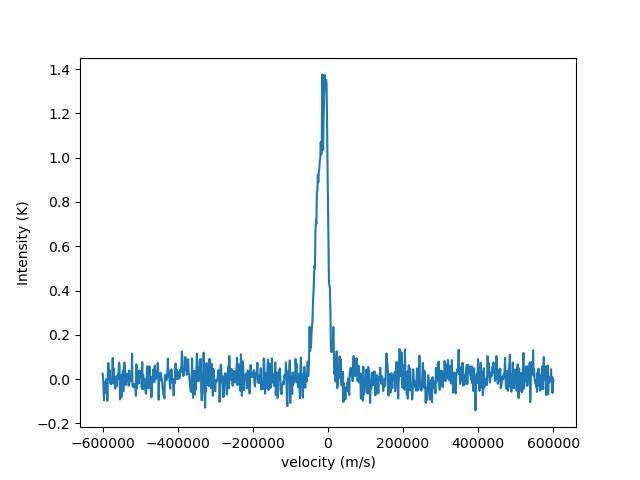

In [30]:
#intensity = [1 for i in range(3772)]
plt.figure()
plt.plot(vaxis,intensity)
plt.xlabel('velocity (m/s)')
plt.ylabel('Intensity (K)')
plt.show()

In [34]:
#Assign the velocity data in each datafile to an array index, allowing me to choose a HEALPix segment

intFiles=[]

for fname in files:
    hdul = fits.open(fname)
    data = hdul[1]
    ndata = data.data
    intFiles.append(hdul[1].data['data'][0,:])


<IPython.core.display.Javascript object>


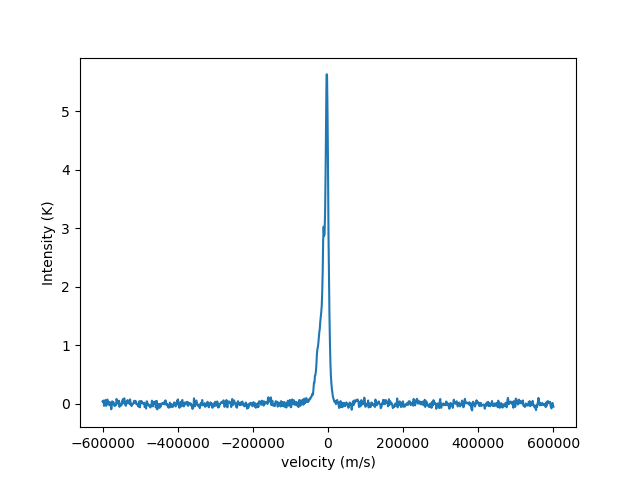

In [35]:
# n is chosen healpix data file between 1 and 192
n=5
intensity = intFiles[n-1]

plt.figure()
plt.plot(vaxis,intensity)
plt.xlabel('velocity (m/s)')
plt.ylabel('Intensity (K)')
plt.show()

In [36]:
nsidenew = 256
nsideold = 1024
nv=933
final_data_array = np.zeros((12 * nsidenew**2, int(nv)))
intermediate = np.zeros((12*nsideold**2, int(nv/311)))

for i in range(3):
    
    for fname in files:
        hdul = fits.open(fname)
        data = hdul[1]
        intermediate[data.data['HPXINDEX']] = data.data['data'][:,int(i*nv/311):int((i+1)*nv/311)]
    for j in range(3):
        final_data_array[:, int(i*nv/311+j)]=hp.pixelfunc.ud_grade(intermediate[:,j], nsidenew)
        
    
   # final_data_array[ndata['HPXINDEX']] = np.nanmean(ndata['data'], axis=1)


/home/dylang65/[/home/src/anaconda]/envs/chart/lib/python3.7/site-packages/healpy/pixelfunc.py:339: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)


In [37]:
print(intFiles[0].shape)

(933,)


<IPython.core.display.Javascript object>


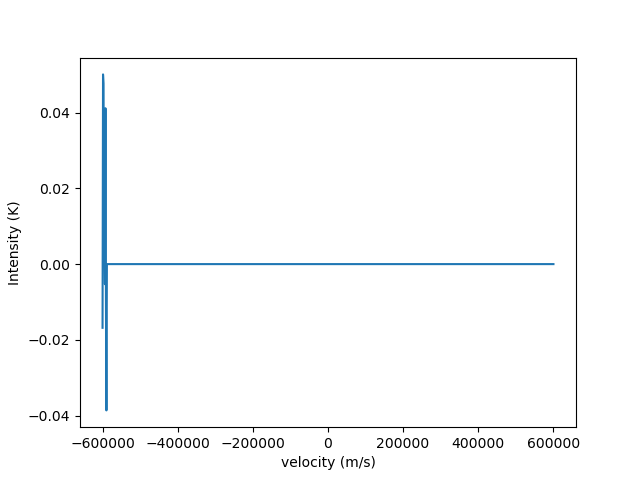

In [38]:
plt.figure()
plt.plot(vaxis,final_data_array[12])
plt.xlabel('velocity (m/s)')
plt.ylabel('Intensity (K)')
plt.show()

<IPython.core.display.Javascript object>


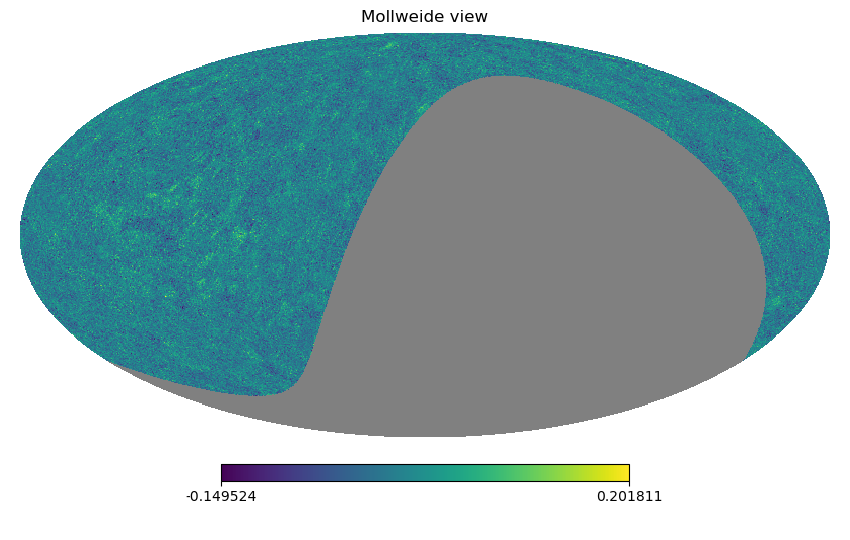

/home/dylang65/[/home/src/anaconda]/envs/chart/lib/python3.7/site-packages/healpy/pixelfunc.py:339: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)


In [39]:
hp.mollview(final_data_array[:,6])

In [40]:
nsidenew = 256
nsideold = 1024
nv=933
final_data_array = np.zeros((12 * nsidenew**2, int(nv)))
intermediate = np.zeros((12*nsideold**2, int(nv/311)))

for i in range(311):
    
    for fname in files:
        hdul = fits.open(fname)
        data = hdul[1]
        intermediate[data.data['HPXINDEX']] = data.data['data'][:,int(i*nv/311):int((i+1)*nv/311)]
    for j in range(3):
        final_data_array[:, int(i*nv/311+j)]=hp.pixelfunc.ud_grade(intermediate[:,j], nsidenew)
        
    

In [48]:
np.savez('/data4/dylang65/finaldataarray', final_data_array=final_data_array)

In [164]:
data=np.load('/data4/dylang65/finaldataarray.npz')['final_data_array']

In [157]:
np.where(data[0,:]==np.amax(data[0,:]))

(array([462]),)

In [155]:
np.amax(data[0,:])

1.3721400126814842

<IPython.core.display.Javascript object>


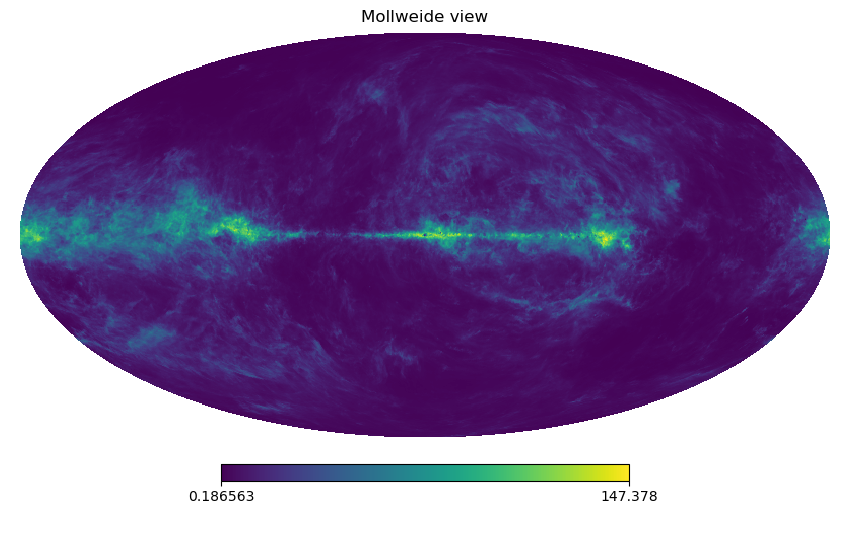

In [351]:
hp.mollview(data[:, 462])

# second number corresponds to what index of 933 velocities, will be plotted

In [168]:
pos_data = np.zeros(len(data))
neg_data = np.zeros(len(data))

In [170]:
# Generating the all positive velocity data set

for i in range(len(data)):
    if np.where(data[i,:]==np.amax(data[i,:]))[0] > 465:
        pos_data[i]=np.amax(data[i,:])


/home/dylang65/[/home/src/anaconda]/envs/chart/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """


In [179]:
print(pos_data)

[0. 0. 0. ... 0. 0. 0.]


<IPython.core.display.Javascript object>


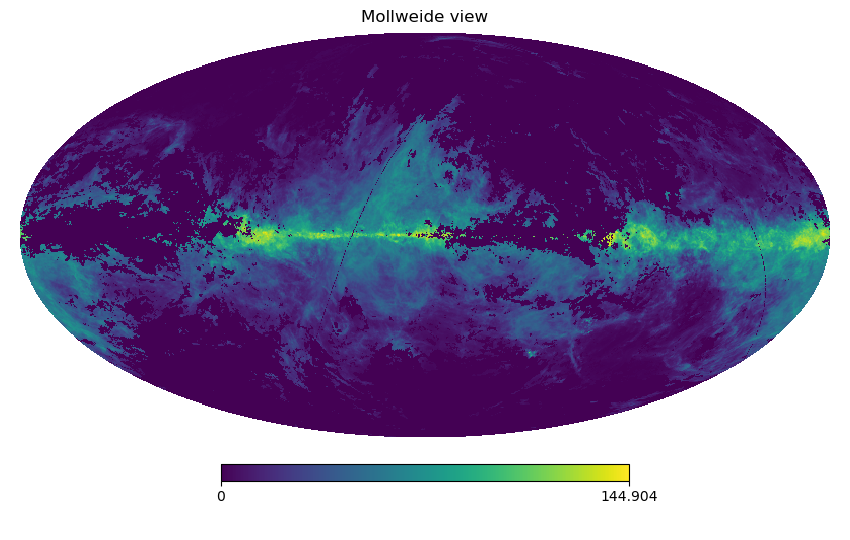

In [175]:
hp.mollview(pos_data[:])

In [176]:
# generating all negative velocites data set

for i in range(len(data)):
    if np.where(data[i,:]==np.amax(data[i,:]))[0] < 466:
        neg_data[i]=np.amax(data[i,:])

/home/dylang65/[/home/src/anaconda]/envs/chart/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  after removing the cwd from sys.path.


In [177]:
print(neg_data)

[1.37214001 1.42345978 1.45418178 ... 3.6969212  3.76618817 3.52981408]


<IPython.core.display.Javascript object>


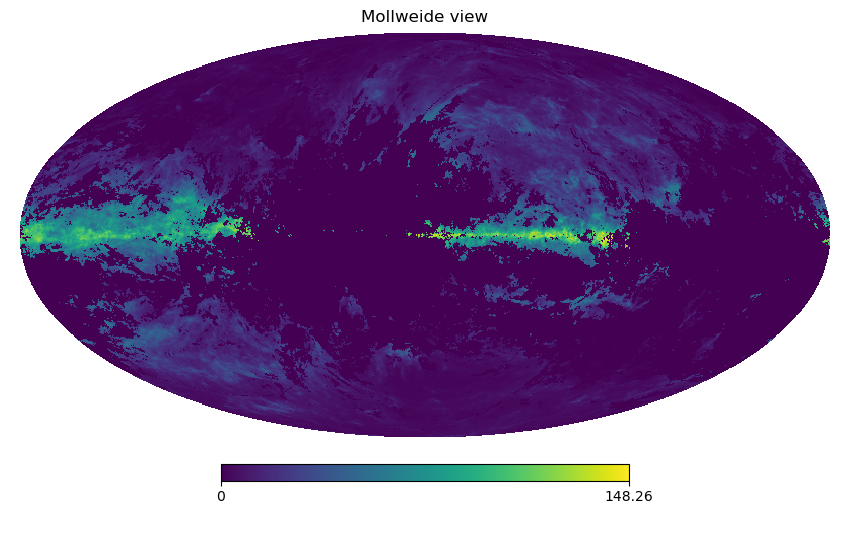

In [178]:
hp.mollview(neg_data[:])

In [378]:
allmax_data = np.zeros(len(data))
for i in range(len(data)):
    allmax_data[i]=np.amax(data[i,:])

<IPython.core.display.Javascript object>


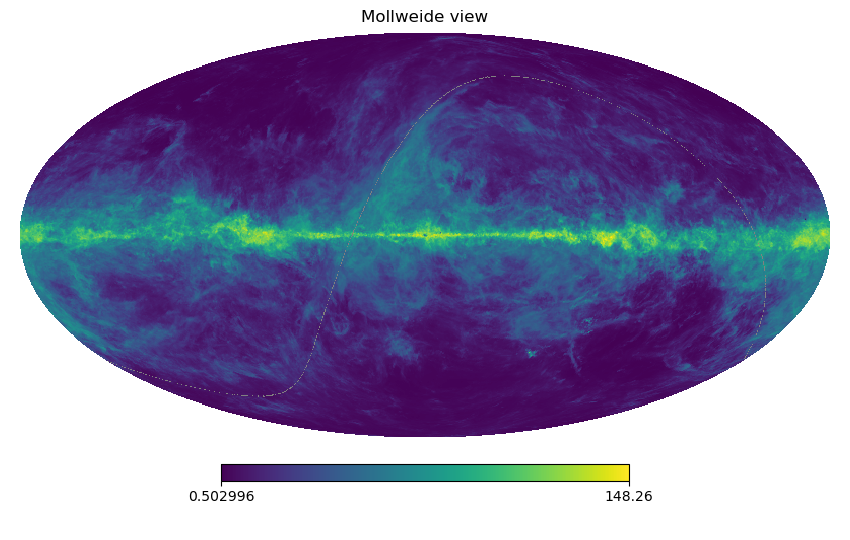

In [381]:
hp.mollview(allmax_data[:])

In [180]:
np.savez('/data4/dylang65/positivedata', pos_data=pos_data)
np.savez('/data4/dylang65/negativedata', neg_data=neg_data)

### Converting Ra Dec to healpix

hp.ang2pix(nside, theta, phi, nest=False, lonlat=False)

In [194]:
lldata=hp.pix2ang(nsidenew, coord, lonlat=True)

In [188]:

coord=np.arange(12*nsidenew**2)

In [211]:
lldata

(array([ 45., 135., 225., ..., 135., 225., 315.]),
 array([ 89.81725848,  89.81725848,  89.81725848, ..., -89.81725848,
        -89.81725848, -89.81725848]))

<IPython.core.display.Javascript object>


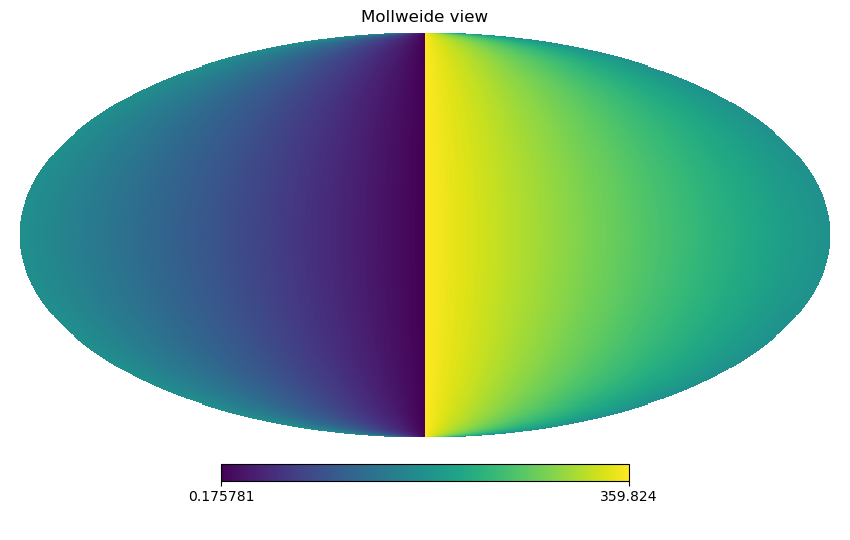

In [195]:
hp.mollview(lldata[0])

<IPython.core.display.Javascript object>


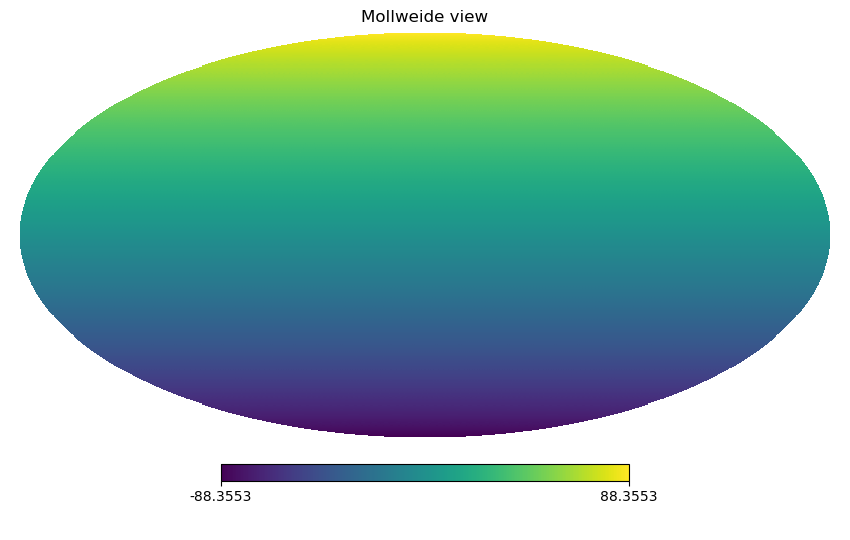

In [196]:
hp.mollview(lldata[1])

In [244]:
long = int(input("Longitude:"))
lat = int(input("Latitude:"))

Longitude:91
Latitude:44


In [232]:
pix=hp.ang2pix(nsidenew, long, lat, lonlat=True)

<IPython.core.display.Javascript object>


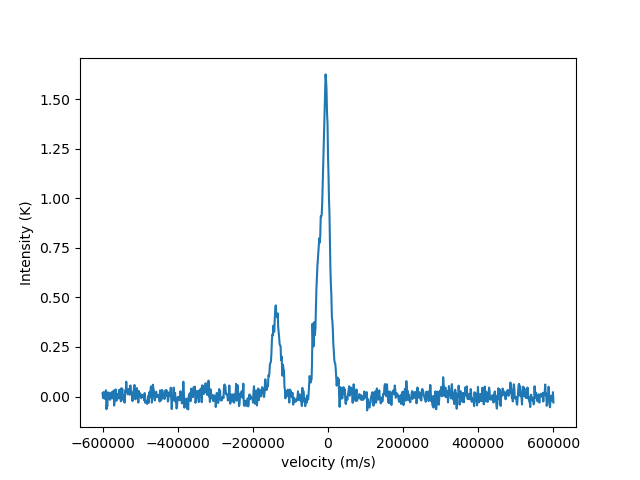

Velocity:  [-3763.68750411]
Intensity:  1.624616265296936


In [243]:
plt.figure()
plt.plot(vaxis, data[pix])
plt.xlabel('velocity (m/s)')
plt.ylabel('Intensity (K)')
plt.show()

print("Velocity: ", vaxis[np.where(data[i,:]==np.amax(data[i,:]))[0]])
print("Intensity: ", np.amax(data[pix]))

Something is wrong with the coordinate conversion code. Instead of using it, I used NASA's online coordinate conversion calculator for the plots below.

In [254]:
coord = SkyCoord('16h53m09.2s', '-22d07m26.9s', frame='icrs')
print(coord)
coord.galactic

<SkyCoord (ICRS): (ra, dec) in deg
    (253.28833333, -22.12413889)>


<SkyCoord (Galactic): (l, b) in deg
    (358.9226954, 13.60006603)>

In [292]:
long=coord.galactic.l
lat =coord.galactic.b
print(long)
print(lat)

358d55m21.7034s
13d36m00.2377s


In [434]:
freq = np.zeros(len(vaxis))
beta = np.zeros(len(vaxis))
for i in range(len(vaxis)):
    beta[i] = vaxis[i]/(3.0*10**(8))
    freq[i] = (1.4204057517667*10**9)/np.sqrt((1+beta[i])/(1-beta[i]))

<IPython.core.display.Javascript object>


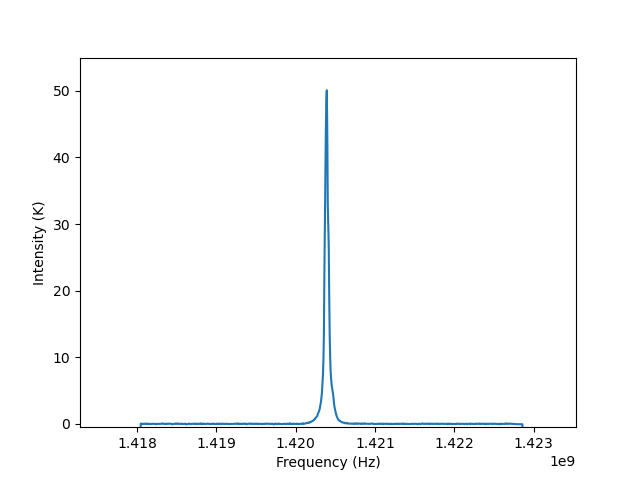

Frequency:  [1.42056996e+09]
Intensity:  50.092368841171265


In [494]:
#use decimal form for coord inputs
inlong=358.92
inlat =13.60
pix=hp.ang2pix(nsidenew, inlong, inlat, lonlat=True)

plt.figure()
plt.plot(freq, data[pix])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Intensity (K)')
#Adjust ylimit after running first time to fit maximum intensity value
plt.ylim(-0.5, 55)
plt.show()

print("Frequency: ", freq[np.where(data[i,:]==np.amax(data[i,:]))[0]])
print("Intensity: ", np.amax(data[pix]))

## Winona plot

In [520]:
# Converting Earth Coordinates to Galactic
x=1

loc = EarthLocation(lat = 44.0499*u.deg, lon = 271.633*u.deg, height = 150*u.m)
time = Time('2021-04-22 11:15:00')
cAltAz = coord.transform_to(AltAz(obstime = time, location = loc))

newAltAzcoordiantes = SkyCoord(alt = cAltAz.alt, az = cAltAz.az + x*u.deg, obstime = time, frame = 'altaz', location = loc)
newAltAzcoordiantes.icrs

<SkyCoord (ICRS): (ra, dec) in deg
    (252.36601674, -21.6800854)>

In [521]:
wincoord = SkyCoord(ra=252.35598424*u.degree, dec=-21.71301459*u.degree, frame='icrs')
print(wincoord)

wincoord.galactic

<SkyCoord (ICRS): (ra, dec) in deg
    (252.35598424, -21.71301459)>


<SkyCoord (Galactic): (l, b) in deg
    (358.71759131, 14.53685921)>

In [517]:
winlon=46.8692
winlat=19.158

<IPython.core.display.Javascript object>


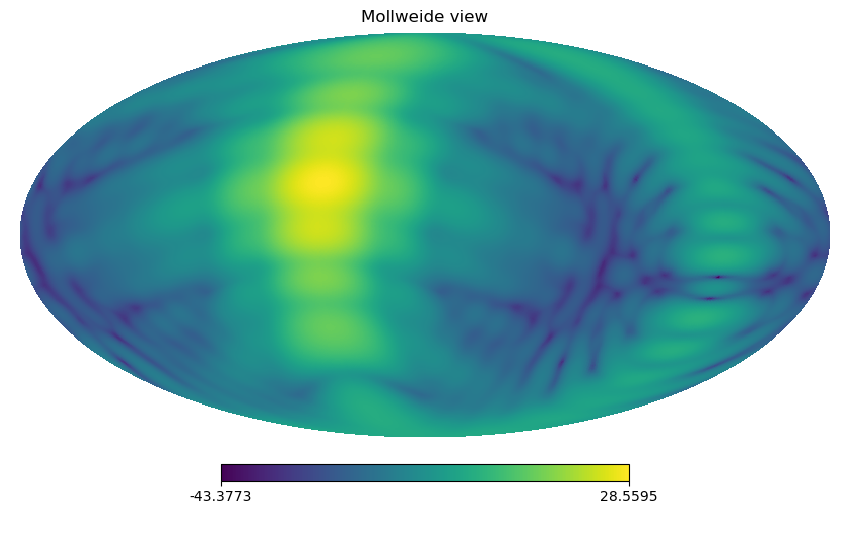

In [531]:
winrotbeam= rotate_map(beam, winlat, winlon)
hp.mollview(winrotbeam)

<IPython.core.display.Javascript object>


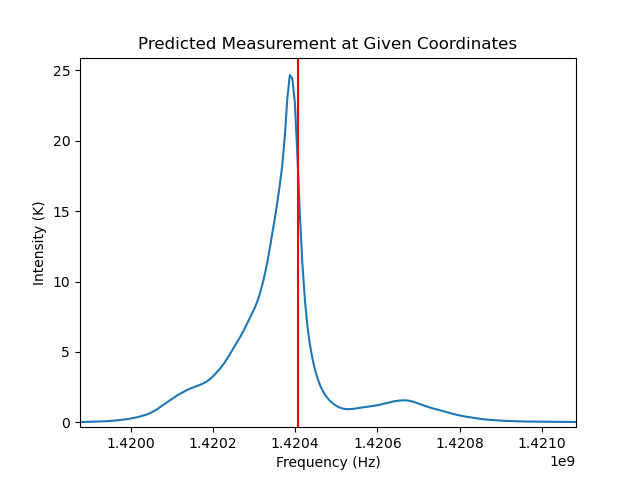

Frequency:  [1.42038698e+09]
Intensity:  24.674613364768994


In [519]:
winona = sum(data * 10**(winrotbeam[:,np.newaxis]/5))/sum(10**(winrotbeam/5))

plt.figure()
plt.plot(freq, winona[:])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Intensity (K)')
plt.title('Predicted Measurement at Given Coordinates')
plt.axvline(x=1.4204057517667*10**9, color ='r', label='Rest Frame Freq')
#Adjust ylimit after running first time to fit maximum intensity value
#plt.ylim(-0.5, 51)
plt.show()

print("Frequency: ", freq[np.where(winona==np.nanmax(winona))[0]])
print("Intensity: ", np.nanmax(winona))

In [310]:
cAltAz = coord.transform_to(AltAz(obstime = time, location = loc))
print(cAltAz)

<SkyCoord (AltAz: obstime=1991-06-06 12:00:00.000, location=(-533353.54259345, -5402083.74615098, 3337731.66679583) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (248.8412447, -7.91007053)>


### Adding in Beam Data

In [322]:
beam = np.loadtxt('/data4/beards/CHART_data/beam_model/chart_beam_v1.2.hpx.txt')

<IPython.core.display.Javascript object>


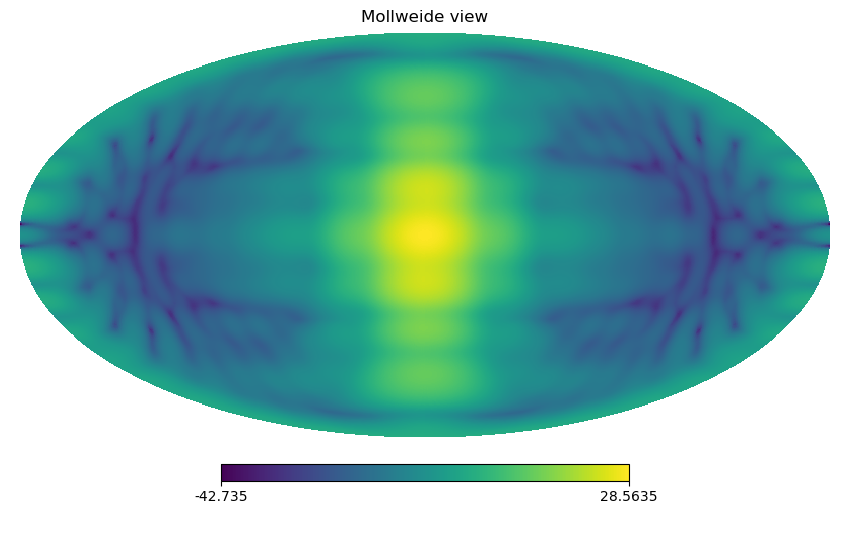

In [323]:
hp.mollview(beam)

In [408]:
def rotate_map(hmap, rot_theta, rot_phi):
    """
    Take hmap (a healpix map array) and return another healpix map array 
    which is ordered such that it has been rotated in (theta, phi) by the 
    amounts given.
    """
    rot_phi=rot_phi*np.pi/180
    rot_theta=rot_theta*np.pi/180
    nside = hp.npix2nside(len(hmap))

    # Get theta, phi for non-rotated map
    t,p = hp.pix2ang(nside, np.arange(hp.nside2npix(nside))) #theta, phi

    # Define a rotator
    r = hp.Rotator(deg=False, rot=[rot_phi,rot_theta])

    # Get theta, phi under rotated co-ordinates
    trot, prot = r(t,p)

    # Interpolate map onto these co-ordinates
    rot_map = hp.get_interp_val(hmap, trot, prot)

    return rot_map
#To do rotate feed

In [495]:
#use rotation angles as galactic coordinates from conversion above
# (map, lat, lon)
rotbeam= rotate_map(beam, inlat, inlong)

<IPython.core.display.Javascript object>


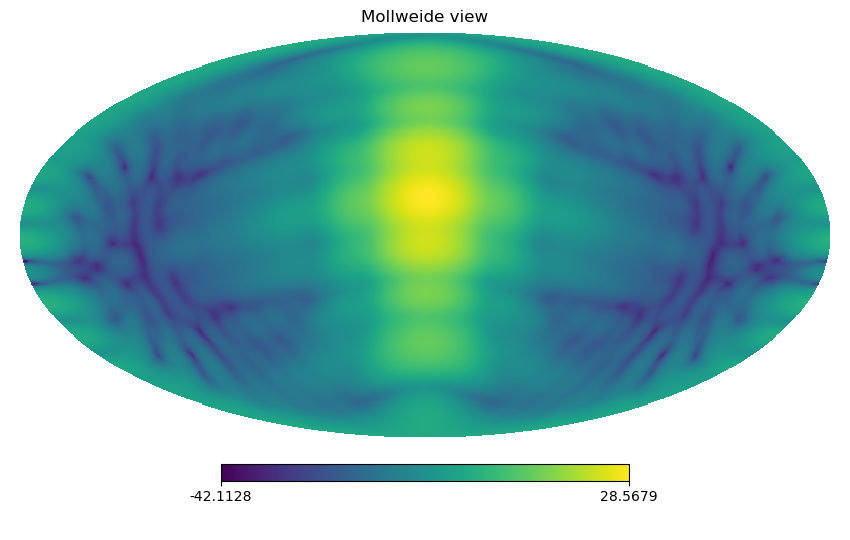

In [496]:
hp.mollview(rotbeam)

In [497]:
databeam = sum(data * 10**(rotbeam[:,np.newaxis]/5))/sum(10**(rotbeam/5))
print(databeam.shape)

(933,)


<IPython.core.display.Javascript object>


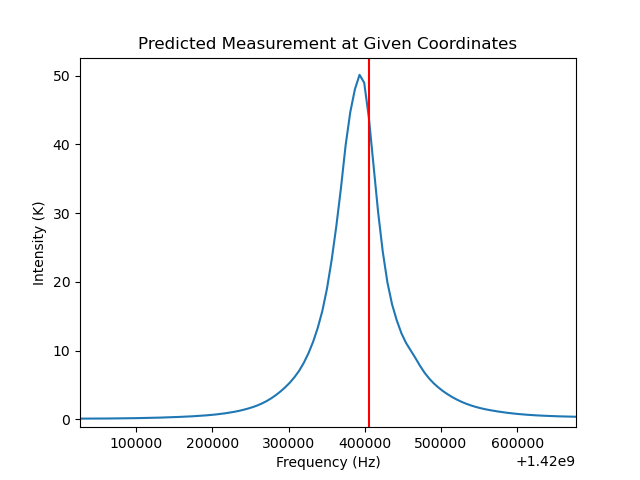

Frequency:  [1.42039308e+09]
Intensity:  50.12731913874389


In [501]:
plt.figure()
plt.plot(freq, databeam[:])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Intensity (K)')
plt.title('Predicted Measurement at Given Coordinates')
plt.axvline(x=1.4204057517667*10**9, color ='r', label='Rest Frame Freq')
#Adjust ylimit after running first time to fit maximum intensity value
#plt.ylim(-0.5, 51)
plt.show()

print("Frequency: ", freq[np.where(databeam==np.nanmax(databeam))[0]])
print("Intensity: ", np.nanmax(databeam))

## Galactic plane plot

In [473]:
abc = rotate_map(beam, 0, 1)
defg = sum(data * 10**(abc[:,np.newaxis]/5))/sum(10**(abc/5))

In [479]:
freq[np.where(defg==np.nanmax(defg))[0]][0]

1420393075.2353346

In [481]:
glon = np.zeros(720)
gfreq = np.zeros(720)

for i in range(720):
    glon[i] = i/2
    
for i in range(720):
    temp = rotate_map(beam, 0, i/2)
    temp2 = sum(data * 10**(temp[:,np.newaxis]/5))/sum(10**(temp/5))
    gfreq[i] = freq[np.where(temp2==np.nanmax(temp2))[0]][0]



<IPython.core.display.Javascript object>


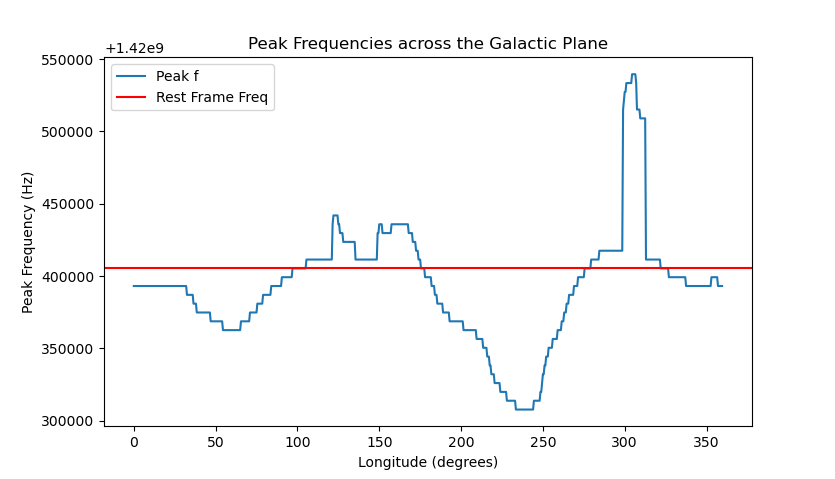

In [485]:
plt.figure()
plt.plot(glon, gfreq, label='Peak f')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Peak Frequency (Hz)')
plt.title('Peak Frequencies across the Galactic Plane')
plt.axhline(y=1.4204057517667*10**9, color ='r', label='Rest Frame Freq')
plt.legend(loc="upper left")
plt.show()


## Megellanic Clouds

In [526]:
mccoord = SkyCoord('5h23m34s', '-69d45m22s', frame='icrs')
print(mccoord)
print(mccoord.galactic)

mclon=280.47
mclat =-32.89
pix=hp.ang2pix(nsidenew, mclong, mclat, lonlat=True)

<SkyCoord (ICRS): (ra, dec) in deg
    (80.89166667, -69.75611111)>
<SkyCoord (Galactic): (l, b) in deg
    (280.46541112, -32.88925205)>


<IPython.core.display.Javascript object>


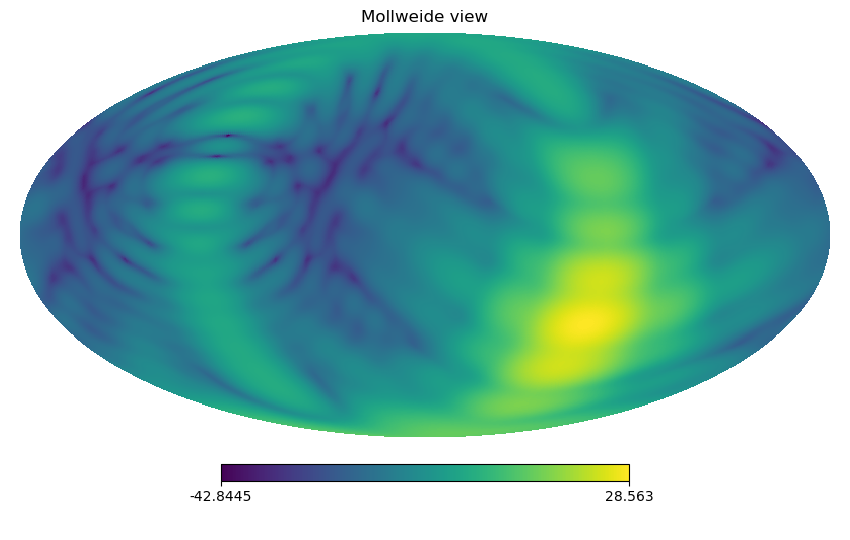

In [528]:
mcrotbeam= rotate_map(beam, mclat, mclon)
hp.mollview(mcrotbeam)

<IPython.core.display.Javascript object>


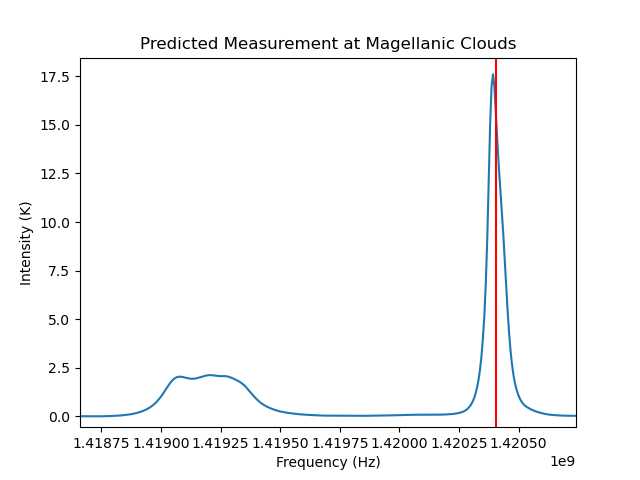

Frequency:  [1.42039308e+09]
Intensity:  17.6058079624019


In [530]:
mcdatabeam = sum(data * 10**(mcrotbeam[:,np.newaxis]/5))/sum(10**(mcrotbeam/5))

plt.figure()
plt.plot(freq, mcdatabeam[:])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Intensity (K)')
plt.title('Predicted Measurement at Magellanic Clouds')
plt.axvline(x=1.4204057517667*10**9, color ='r', label='Rest Frame Freq')
plt.show()

print("Frequency: ", freq[np.where(mcdatabeam==np.nanmax(mcdatabeam))[0]])
print("Intensity: ", np.nanmax(mcdatabeam))